In [1]:
%load_ext autoreload
%autoreload 2

In [15]:
import rl_equation_solver
from rl_equation_solver.environment.algebraic import Env
from rl_equation_solver.agent.dqn import Agent as AgentDQN
from rl_equation_solver.agent.gcn import Agent as AgentGCN
from rl_equation_solver.agent.lstm import Agent as AgentLSTM
from rl_equation_solver.utilities import utilities
from rl_equation_solver.utilities.utilities import GraphEmbedding
import networkx as nx
import numpy as np
from torch_geometric.utils.convert import from_networkx
import matplotlib.pyplot as plt
from rex import init_logger

In [3]:
init_logger(__name__, log_level='DEBUG')
init_logger('rl_equation_solver', log_level="DEBUG")

<Logger rl_equation_solver (DEBUG)>

In [52]:
def moving_avg(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

def make_plot(agent, round, start=0):
    fig, ax = plt.subplots(1, 3, figsize=(10, 7))
    avg_complex = []
    avg_reward = []
    avg_loss = []
    for episode in list(agent.history.keys())[start:]:
        avg_complex.append(np.mean(agent.history[episode]['complexity']))
        avg_loss.append(np.nanmean(agent.history[episode]['loss']))
        avg_reward.append(np.mean(agent.history[episode]['reward']))
    
    y = moving_avg(avg_complex, 1)
    x = np.arange(len(y))
    a, b = np.polyfit(x, y, 1)
    ax[0].scatter(x, y)
    ax[0].plot(x, a*x+b, color='red')

    y = moving_avg(avg_loss, 1)
    x = np.arange(len(y))
    a, b = np.polyfit(x, y, 1)
    ax[1].scatter(x, y)
    ax[1].plot(x, a*x+b, color='red')
    
    y = moving_avg(avg_reward, 1)
    x = np.arange(len(y))
    a, b = np.polyfit(x, y, 1)
    ax[2].scatter(x, y)
    ax[2].plot(x, a*x+b, color='red')
    
    ax[0].set_title('Complexity')
    ax[1].set_title('Loss')
    ax[2].set_title("Reward")
    plt.annotate('Episode', (0.4, 0.01), xycoords='figure fraction')
    fig.suptitle(f'Round {round}')
    fig.savefig(f'./figs/round_{round}.png', dpi=300)

In [281]:
dqn_env = Env(order=3)
agent_dqn = AgentDQN(dqn_env, device='cuda:0')

INFO - 2023-04-11 06:52:22,427 [dqn.py:35] : Initialized Agent with device cuda:0


INFO - 2023-04-11 06:49:00,530 [base.py:209] : episode 10, {'complexity': 21, 'loss': 4144386048.0, 'reward': '-2.000e+00', 'state': -a2/a0}
INFO - 2023-04-11 06:49:00,590 [base.py:209] : episode 10, {'complexity': 19, 'loss': 46988824576.0, 'reward': '2.000e+00', 'state': sqrt(-a2/a0)}
INFO - 2023-04-11 06:49:00,673 [base.py:209] : episode 10, {'complexity': 41, 'loss': 41202040832.0, 'reward': '-2.200e+01', 'state': sqrt(-a2/a0)/a0}
INFO - 2023-04-11 06:49:00,873 [base.py:209] : episode 10, {'complexity': 73, 'loss': 35966615552.0, 'reward': '-3.200e+01', 'state': -1/2 + sqrt(-a2/a0)/a0}
INFO - 2023-04-11 06:49:01,119 [base.py:209] : episode 10, {'complexity': 75, 'loss': 2866816000.0, 'reward': '-2.000e+00', 'state': (-a0/2 + sqrt(-a2/a0))/a0**2}
INFO - 2023-04-11 06:49:01,348 [base.py:209] : episode 10, {'complexity': 89, 'loss': 18.58233070373535, 'reward': '-1.400e+01', 'state': (-a0/2 + sqrt(-a2/a0))/a0**3}
INFO - 2023-04-11 06:49:01,637 [base.py:209] : episode 10, {'complexity'

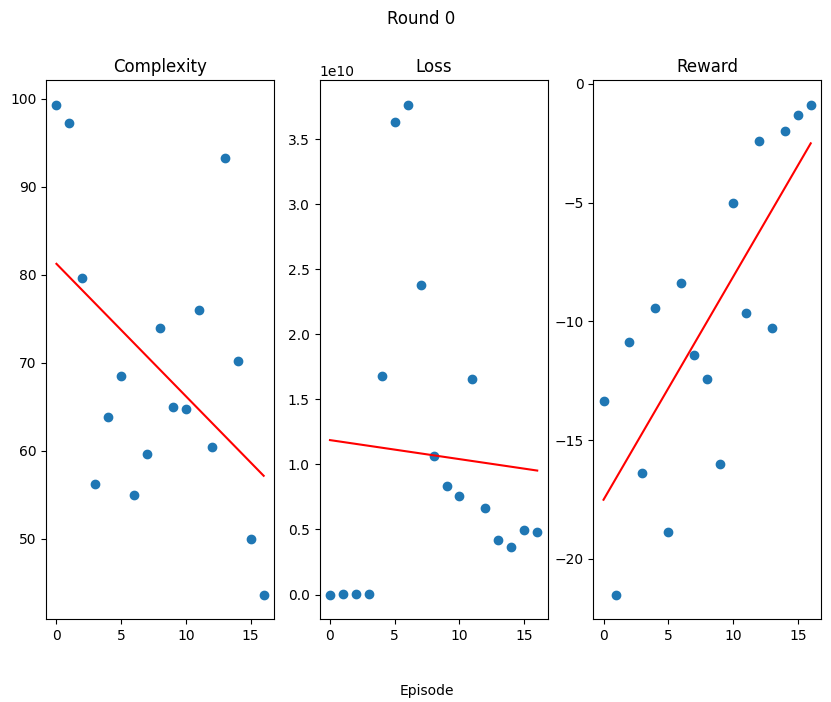

In [279]:
for i in range(1):
    agent_dqn.train(num_episodes=10)
    make_plot(agent_dqn, round=i, start=3)    

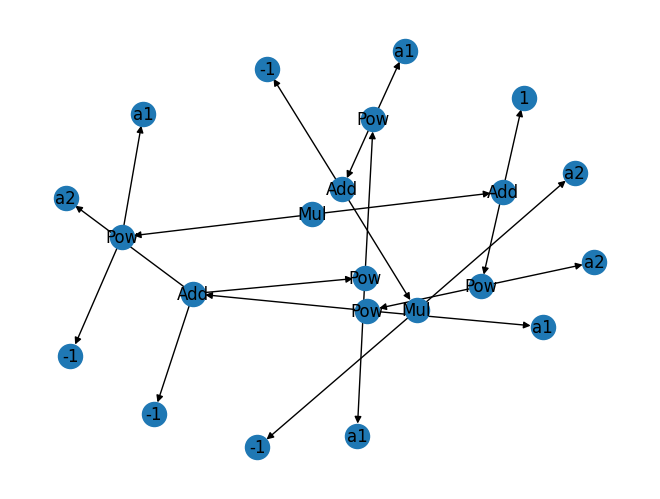

In [253]:
nx.draw(dqn_env.state_graph, labels=dqn_env.node_labels)

In [282]:
gcn_env = Env()
agent_gcn = AgentGCN(gcn_env, device='cuda:0')

INFO - 2023-04-11 06:52:43,015 [gcn.py:35] : Initialized Agent with device cuda:0


INFO - 2023-04-11 06:30:28,698 [base.py:210] : episode 10, {'complexity': 19, 'loss': 25.843765258789062, 'reward': '0.000e+00', 'state': -a2}
INFO - 2023-04-11 06:30:28,805 [base.py:210] : episode 10, {'complexity': 19, 'loss': 20.500499725341797, 'reward': '0.000e+00', 'state': -a2}
INFO - 2023-04-11 06:30:28,920 [base.py:210] : episode 10, {'complexity': 19, 'loss': 25.0810604095459, 'reward': '0.000e+00', 'state': -a2}
INFO - 2023-04-11 06:30:29,032 [base.py:210] : episode 10, {'complexity': 19, 'loss': 27.327260971069336, 'reward': '0.000e+00', 'state': -a2}
INFO - 2023-04-11 06:30:29,146 [base.py:210] : episode 10, {'complexity': 21, 'loss': 23.441570281982422, 'reward': '-2.000e+00', 'state': -2*a2}
INFO - 2023-04-11 06:30:29,237 [base.py:210] : episode 10, {'complexity': 15, 'loss': 21.001890182495117, 'reward': '6.000e+00', 'state': -2}
INFO - 2023-04-11 06:30:29,348 [base.py:210] : episode 10, {'complexity': 27, 'loss': 20.721216201782227, 'reward': '-1.200e+01', 'state': (-2

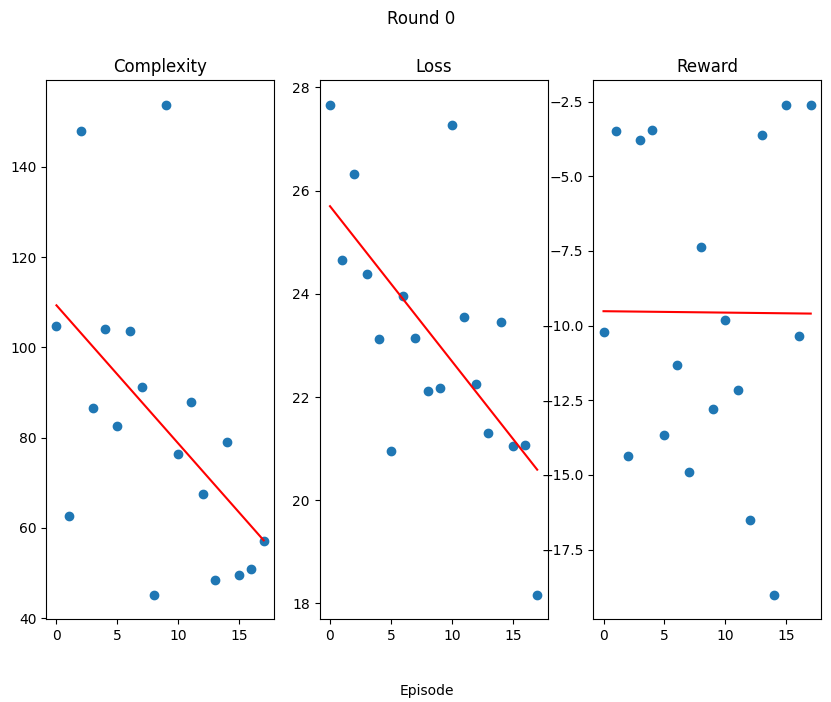

In [263]:
for i in range(1):
    agent_gcn.train(num_episodes=10)
    make_plot(agent_gcn, round=i, start=2)    

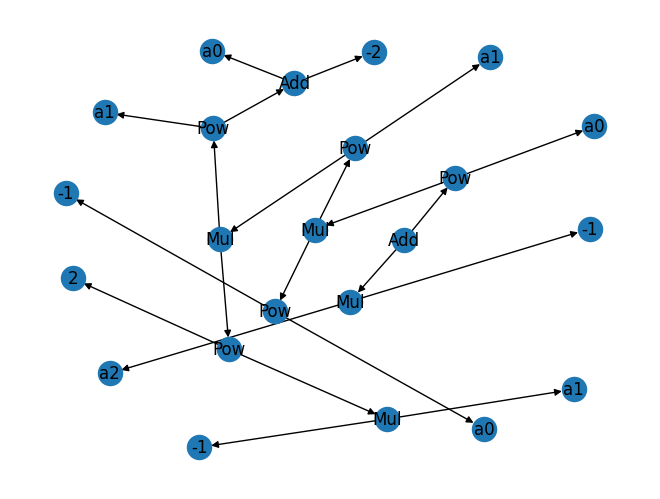

In [256]:
nx.draw(gcn_env.state_graph, labels=gcn_env.node_labels)

In [283]:
lstm_env = Env()
agent_lstm = AgentLSTM(lstm_env, device='cuda:0')

INFO - 2023-04-11 06:53:25,741 [lstm.py:36] : Initialized Agent with device cuda:0


INFO - 2023-04-11 06:27:09,494 [base.py:210] : episode 0, {'complexity': 41, 'loss': nan, 'reward': '-2.200e+01', 'state': -a2 - 2}
INFO - 2023-04-11 06:27:09,637 [base.py:210] : episode 0, {'complexity': 75, 'loss': nan, 'reward': '-3.400e+01', 'state': a1 - a2 - 2}
INFO - 2023-04-11 06:27:09,838 [base.py:210] : episode 0, {'complexity': 75, 'loss': nan, 'reward': '0.000e+00', 'state': a1 - a2 - 4}
INFO - 2023-04-11 06:27:09,995 [base.py:210] : episode 0, {'complexity': 75, 'loss': nan, 'reward': '0.000e+00', 'state': a1 - a2 - 5}
INFO - 2023-04-11 06:27:10,119 [base.py:210] : episode 0, {'complexity': 39, 'loss': nan, 'reward': '3.600e+01', 'state': a1 - 5}
INFO - 2023-04-11 06:27:10,228 [base.py:210] : episode 0, {'complexity': 39, 'loss': nan, 'reward': '0.000e+00', 'state': a1 - 6}
INFO - 2023-04-11 06:27:10,388 [base.py:210] : episode 0, {'complexity': 39, 'loss': nan, 'reward': '0.000e+00', 'state': a1 - 6}
INFO - 2023-04-11 06:27:10,518 [base.py:210] : episode 0, {'complexity':

C:\Users\bbent\AppData\Local\Temp\ipykernel_8564\1979731588.py:11: RuntimeWarning: Mean of empty slice
  avg_loss.append(np.nanmean(agent.history[episode]['loss']))


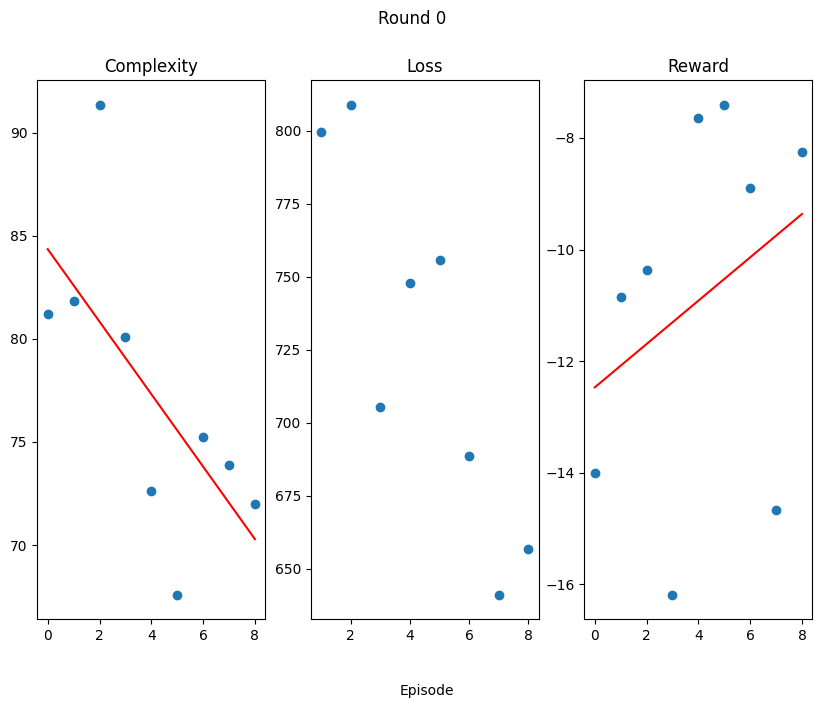

In [258]:
for i in range(1):
    agent_lstm.train(num_episodes=10)
    make_plot(agent_lstm, round=i, start=1)    

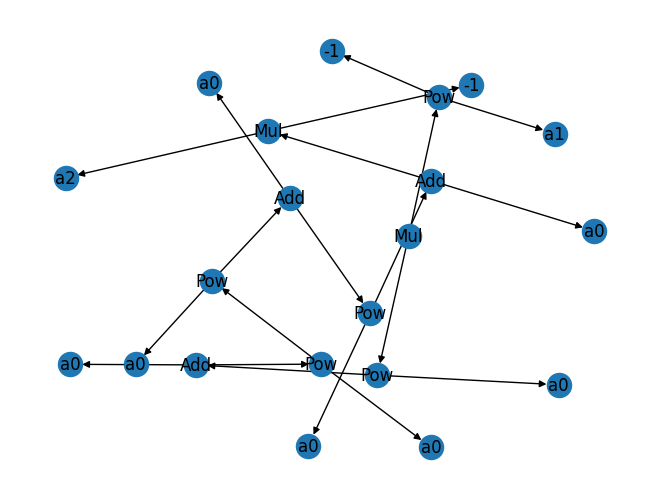

In [259]:
nx.draw(lstm_env.state_graph, labels=lstm_env.node_labels)